In [5]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [6]:
#Unidade 1
dados_camera = np.load("D:\\Semestre 2023.2\\AICT III\\Position-Beam-Prediction-main\\DADOS_EXTRAIDOS\\scenario1_seq_index_1-2422.npy")
dados_gps1 = np.load("D:\\Semestre 2023.2\\AICT III\\Position-Beam-Prediction-main\\DADOS_EXTRAIDOS\\scenario1_unit1_loc_1-2422.npy")
dados_mmWave = np.load("D:\\Semestre 2023.2\\AICT III\\Position-Beam-Prediction-main\\DADOS_EXTRAIDOS\\scenario1_unit1_pwr_60ghz_1-2422.npy")

#Unidade 2
dados_gps2 = np.load("D:\\Semestre 2023.2\\AICT III\\Position-Beam-Prediction-main\\DADOS_EXTRAIDOS\\scenario1_unit2_loc_1-2422.npy")


print(dados_gps2)
print(dados_mmWave)

[[  33.42054916 -111.9290058 ]
 [  33.42054569 -111.9290057 ]
 [  33.42054224 -111.9290056 ]
 ...
 [  33.4202489  -111.928985  ]
 [  33.42024312 -111.9289844 ]
 [  33.42023732 -111.9289838 ]]
[[0.01730902 0.01840585 0.01912065 ... 0.05110651 0.05873322 0.04869884]
 [0.01645166 0.01769243 0.01889294 ... 0.06078354 0.0716387  0.04498141]
 [0.01660066 0.0179997  0.01909992 ... 0.08145504 0.09183583 0.04442751]
 ...
 [0.02337808 0.12565999 0.24259786 ... 0.02453577 0.02532717 0.0250567 ]
 [0.02617448 0.16347712 0.26710972 ... 0.02410283 0.02356164 0.02191405]
 [0.02534583 0.14362955 0.27882746 ... 0.02268245 0.02171429 0.02398737]]


In [11]:
dados_feixes = np.argmax(dados_mmWave , axis=1)
dados1 = np.column_stack((dados_gps2,dados_gps1))
def indices_n_maiores_valores_por_linha(matriz,n):
    indices_n_maiores_por_linha = []

    for linha in matriz:
        indices_ordenados = np.argsort(linha)[::-1]
        indices_n_maiores = indices_ordenados[:n]
        indices_n_maiores_por_linha.append(indices_n_maiores)

    return np.array(indices_n_maiores_por_linha)
top2=indices_n_maiores_valores_por_linha(dados_mmWave,2)
top3=indices_n_maiores_valores_por_linha(dados_mmWave,3)
top4=indices_n_maiores_valores_por_linha(dados_mmWave,4)
top5=indices_n_maiores_valores_por_linha(dados_mmWave,5)
print (dados1)
print (dados_feixes)
print (top2)
print (top3)
print (top4)
print (top5)




[[  33.42054916 -111.9290058    33.42034722 -111.92915278]
 [  33.42054569 -111.9290057    33.42034722 -111.92915278]
 [  33.42054224 -111.9290056    33.42034722 -111.92915278]
 ...
 [  33.4202489  -111.928985     33.42034722 -111.92915278]
 [  33.42024312 -111.9289844    33.42034722 -111.92915278]
 [  33.42023732 -111.9289838    33.42034722 -111.92915278]]
[62 62 62 ...  5  3  3]
[[62 61]
 [62 61]
 [62 61]
 ...
 [ 5  4]
 [ 3  4]
 [ 3  4]]
[[62 61 63]
 [62 61 60]
 [62 61 60]
 ...
 [ 5  4  6]
 [ 3  4  5]
 [ 3  4  2]]
[[62 61 63 49]
 [62 61 60 63]
 [62 61 60 49]
 ...
 [ 5  4  6  3]
 [ 3  4  5  2]
 [ 3  4  2  5]]
[[62 61 63 49 60]
 [62 61 60 63 49]
 [62 61 60 49 50]
 ...
 [ 5  4  6  3  7]
 [ 3  4  5  2  6]
 [ 3  4  2  5  6]]


In [12]:
X=dados1
Y=dados_feixes
Y1=top2
Y2=top3
Y3=top4
Y4=top5

print (X.shape)
print (Y.shape)
print (Y1.shape)
print (Y2.shape)
print (Y3.shape)
print (Y4.shape)

(2422, 4)
(2422,)
(2422, 2)
(2422, 3)
(2422, 4)
(2422, 5)


In [13]:
sc1 = StandardScaler()
sc1.fit(X)

X_norm = sc1.transform(X)


In [14]:
X_train , X_test , Y_train , Y_test = train_test_split(X_norm , Y, test_size=0.6)

X1_train , X1_test , Y1_train , Y1_test = train_test_split(X_norm , Y1, test_size=0.8)
X2_train , X2_test , Y2_train , Y2_test = train_test_split(X_norm , Y2, test_size=0.8)
X3_train , X3_test , Y3_train , Y3_test = train_test_split(X_norm , Y3, test_size=0.8)
X4_train , X4_test , Y4_train , Y4_test = train_test_split(X_norm , Y4, test_size=0.8)

In [15]:
rede = MLPRegressor(hidden_layer_sizes=(500,400,300,10,3) , 
                    max_iter=300000, 
                    tol=0.0000001, 
                    learning_rate_init=0.001 , 
                    solver="adam" , 
                    activation="tanh" , 
                    learning_rate="constant" , 
                    verbose=True,
                    shuffle=True
                   )

reglinear = SGDRegressor(max_iter=300000,
                         tol=0.0000001,
                         learning_rate="constant",
                         verbose=True)



In [16]:
rede.fit(X_train , Y_train)
reglinear.fit(X_train , Y_train)

Iteration 1, loss = 707.80742138
Iteration 2, loss = 690.47282008
Iteration 3, loss = 686.21093727
Iteration 4, loss = 681.29665922
Iteration 5, loss = 679.37619512
Iteration 6, loss = 677.27510603
Iteration 7, loss = 676.23082859
Iteration 8, loss = 675.13541464
Iteration 9, loss = 674.05579844
Iteration 10, loss = 672.99534857
Iteration 11, loss = 671.98538371
Iteration 12, loss = 671.00674426
Iteration 13, loss = 670.06347217
Iteration 14, loss = 669.14453486
Iteration 15, loss = 668.25941283
Iteration 16, loss = 667.38386321
Iteration 17, loss = 666.53703246
Iteration 18, loss = 665.70131503
Iteration 19, loss = 664.90459983
Iteration 20, loss = 664.09114758
Iteration 21, loss = 663.30823891
Iteration 22, loss = 662.53001523
Iteration 23, loss = 661.77027537
Iteration 24, loss = 661.00631860
Iteration 25, loss = 660.26487124
Iteration 26, loss = 659.52884485
Iteration 27, loss = 658.78748879
Iteration 28, loss = 658.06880584
Iteration 29, loss = 657.34214554
Iteration 30, loss = 65

SGDRegressor(learning_rate='constant', max_iter=300000, tol=1e-07, verbose=True)

ACURÁCIA

In [18]:
Y_rede_pred = rede.predict(X_test)
Score_rede = r2_score(Y_test,Y_rede_pred)
print("Acuracia MLP: ", Score_rede*100)

Y_reglinear_pred = reglinear.predict(X_test)
Score_reglinear = r2_score(Y_test,Y_reglinear_pred)
print("Acuracia Regressao Linear: ", Score_reglinear*100)

Acuracia MLP:  97.35174584118873
Acuracia Regressao Linear:  94.40336774038896


[47 10  5 ... 47 21 23]
[47.49122353 10.23918685  4.85084277 ... 47.98104626 20.571951
 22.69593384]
[44.50994022  8.87891529  0.82938576 ... 46.64001216 23.96108613
 22.57439483]


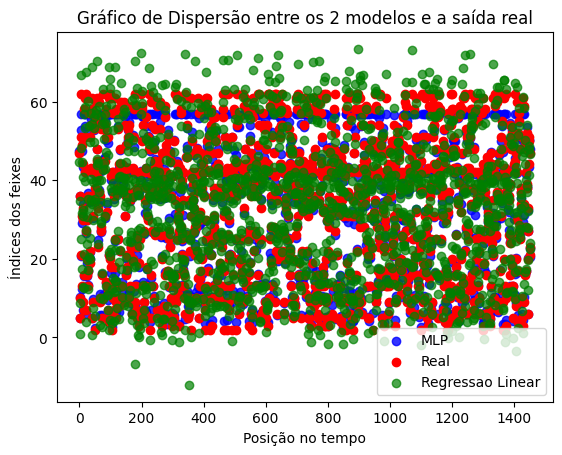

In [21]:
print(Y_test)
print(Y_rede_pred)
print(Y_reglinear_pred)
vet=np.arange(0, 1454, 1)

plt.scatter(vet,Y_rede_pred, alpha = 0.8, color = 'blue', label= 'MLP')
plt.scatter(vet,Y_test, color = 'red',alpha = 1, label= 'Real')
plt.scatter(vet,Y_reglinear_pred, alpha = 0.7,color = 'green',label= 'Regressao Linear')
plt.legend()
plt.xlabel('Posição no tempo')
plt.ylabel('Índices dos feixes')
plt.title('Gráfico de Dispersão entre os 2 modelos e a saída real')
plt.show()


In [26]:
plt.plot(vet, Y_rede_pred, alpha=0.5, label="Reais")
plt.xlabel("Posicao no tempo")
plt.ylabel("Indices dos Feixes")
plt.show()

In [27]:
plt.plot(vet, Y_reglinear_pred, alpha=0.5, label="Reais")
plt.xlabel("Posicao no tempo")
plt.ylabel("Indices dos Feixes")
plt.show()